In [162]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

## Data Encoding

In [163]:
micro_array_path='../datasets/patients.csv'

In [164]:
data=pd.read_csv(micro_array_path)

In [165]:
data.shape

(240, 12)

In [166]:
data.head()

,DLBCL sample (LYM number),Analysis Set,Follow-up (years),Status at follow-up,Subgroup,IPI Group,Germinal center B cell signature,Lymph node signature,Proliferation signature,BMP6,MHC class II signature,Outcome predictor score
0,2,Training,4.0,Alive,GCB,Low,0.28,-0.07,-0.56,0.46,0.57,-0.23
1,4,Training,4.9,Alive,GCB,Medium,1.01,-1.15,-1.04,0.23,0.63,-0.38
2,6,Training,5.6,Alive,GCB,Low,0.83,-2.11,0.52,-0.28,0.38,0.20
3,7,Training,12.1,Alive,GCB,Medium,0.89,-1.33,0.01,-0.64,0.93,-0.41
4,8,Training,0.6,Dead,ABC,Medium,0.27,-1.56,1.56,-0.67,-2.50,1.25


<AxesSubplot: >

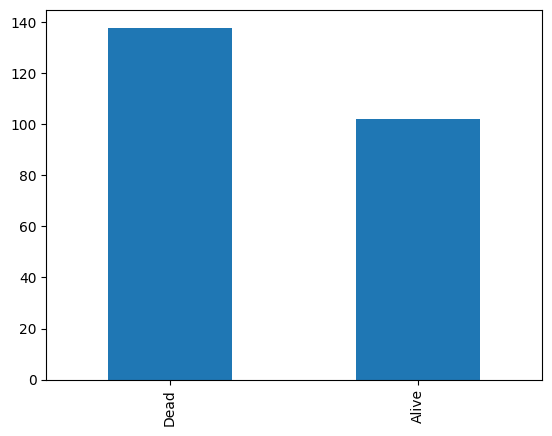

In [167]:
data['Status at follow-up'].value_counts().plot(kind="bar")

In [168]:
[a, b] = data['Status at follow-up'].value_counts()

print('\n', a/(a+b), '\n', round(1-a/(a+b), 3))


 0.575 
 0.425


In [169]:
data.isna().sum()

DLBCL sample (LYM number)            0
Analysis Set                         0
Follow-up (years)                    0
Status at follow-up                  0
Subgroup                             0
IPI Group                           17
Germinal center B cell signature     0
Lymph node signature                 0
Proliferation signature              0
BMP6                                 0
MHC class II signature               0
Outcome predictor score              0
dtype: int64

<AxesSubplot: >

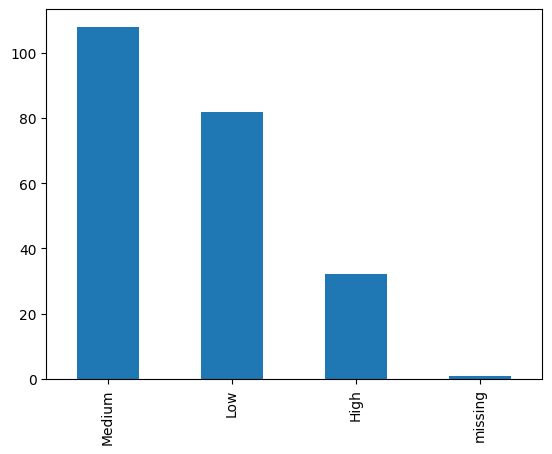

In [170]:
data['IPI Group'].value_counts().plot(kind='bar')

In [171]:
data.fillna({'IPI Group': 'Medium'}, inplace=True)

In [172]:
mapping = {'Low': 0, 'Medium': 1, 'High':2, 'missing':1}
data.replace({'IPI Group':mapping}, inplace=True)

data.head()

,DLBCL sample (LYM number),Analysis Set,Follow-up (years),Status at follow-up,Subgroup,IPI Group,Germinal center B cell signature,Lymph node signature,Proliferation signature,BMP6,MHC class II signature,Outcome predictor score
0,2,Training,4.0,Alive,GCB,0,0.28,-0.07,-0.56,0.46,0.57,-0.23
1,4,Training,4.9,Alive,GCB,1,1.01,-1.15,-1.04,0.23,0.63,-0.38
2,6,Training,5.6,Alive,GCB,0,0.83,-2.11,0.52,-0.28,0.38,0.20
3,7,Training,12.1,Alive,GCB,1,0.89,-1.33,0.01,-0.64,0.93,-0.41
4,8,Training,0.6,Dead,ABC,1,0.27,-1.56,1.56,-0.67,-2.50,1.25


In [173]:
data.drop(columns=['Analysis Set'], inplace=True)
data.head()

,DLBCL sample (LYM number),Follow-up (years),Status at follow-up,Subgroup,IPI Group,Germinal center B cell signature,Lymph node signature,Proliferation signature,BMP6,MHC class II signature,Outcome predictor score
0,2,4.0,Alive,GCB,0,0.28,-0.07,-0.56,0.46,0.57,-0.23
1,4,4.9,Alive,GCB,1,1.01,-1.15,-1.04,0.23,0.63,-0.38
2,6,5.6,Alive,GCB,0,0.83,-2.11,0.52,-0.28,0.38,0.20
3,7,12.1,Alive,GCB,1,0.89,-1.33,0.01,-0.64,0.93,-0.41
4,8,0.6,Dead,ABC,1,0.27,-1.56,1.56,-0.67,-2.50,1.25


In [174]:
np.unique(data.Subgroup)

array(['ABC', 'GCB', 'Type III'], dtype=object)

<AxesSubplot: >

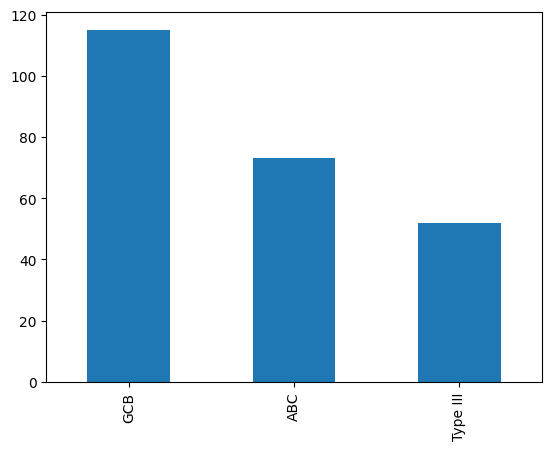

In [175]:
data['Subgroup'].value_counts().plot(kind='bar')

In [176]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(data['Subgroup'])
# Drop column B as it is now encoded
data.drop('Subgroup',axis = 1, inplace=True)
# Join the encoded df
data = data.join(one_hot)

In [177]:
data.isna().sum()

DLBCL sample (LYM number)           0
Follow-up (years)                   0
Status at follow-up                 0
IPI Group                           0
Germinal center B cell signature    0
Lymph node signature                0
Proliferation signature             0
BMP6                                0
MHC class II signature              0
Outcome predictor score             0
ABC                                 0
GCB                                 0
Type III                            0
dtype: int64

In [178]:
data

,DLBCL sample (LYM number),Follow-up (years),Status at follow-up,IPI Group,Germinal center B cell signature,Lymph node signature,Proliferation signature,BMP6,MHC class II signature,Outcome predictor score,ABC,GCB,Type III
0,2,4.0,Alive,0,0.28,-0.07,-0.56,0.46,0.57,-0.23,0,1,0
1,4,4.9,Alive,1,1.01,-1.15,-1.04,0.23,0.63,-0.38,0,1,0
2,6,5.6,Alive,0,0.83,-2.11,0.52,-0.28,0.38,0.20,0,1,0
3,7,12.1,Alive,1,0.89,-1.33,0.01,-0.64,0.93,-0.41,0,1,0
4,8,0.6,Dead,1,0.27,-1.56,1.56,-0.67,-2.50,1.25,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,400,0.3,Dead,1,-1.28,-1.60,0.87,0.30,0.99,0.76,1,0,0
236,411,3.1,Dead,1,-0.85,-0.71,-0.50,2.51,0.89,0.80,0,0,1
237,418,7.7,Alive,1,-1.12,1.89,-0.23,0.27,0.24,-0.19,0,0,1
238,435,2.7,Dead,0,-0.36,0.50,-0.27,1.21,-0.71,0.51,0,1,0


#### Scaling 

In [181]:
from scipy import stats

# transform data
status=data['Status at follow-up']
data.drop(columns=['Status at follow-up'], inplace=True)
# Z-Score using
for col in data.columns:
    data[col] = stats.zscore(data[col])
# join
data=data.join(status)

data.head()
data.to_csv('../datasets/patients_clean_fim_2.csv')

In [182]:
data

,DLBCL sample (LYM number),Follow-up (years),IPI Group,Germinal center B cell signature,Lymph node signature,Proliferation signature,BMP6,MHC class II signature,Outcome predictor score,ABC,GCB,Type III,Status at follow-up
0,-1.507132,-0.093726,-1.205044,0.276949,-0.067801,-0.831801,0.591610,0.603391,-0.313328,-0.661155,1.042572,-0.525924,Alive
1,-1.491123,0.111596,0.317117,0.927809,-1.024989,-1.537267,0.321428,0.666236,-0.520563,-0.661155,1.042572,-0.525924,Alive
2,-1.475114,0.271291,-1.205044,0.767323,-1.875822,0.755498,-0.277670,0.404385,0.280746,-0.661155,1.042572,-0.525924,Alive
3,-1.467110,1.754174,0.317117,0.820818,-1.184520,0.005940,-0.700564,0.980456,-0.562010,-0.661155,1.042572,-0.525924,Alive
4,-1.459105,-0.869387,0.317117,0.268034,-1.388365,2.284008,-0.735805,-2.612136,1.731391,1.512505,-0.959166,-0.525924,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,1.678627,-0.937828,0.317117,-1.113928,-1.423817,1.269900,0.403657,1.043301,1.054423,1.512505,-0.959166,-0.525924,Dead
236,1.766675,-0.299048,0.317117,-0.730545,-0.635023,-0.743618,2.999752,0.938560,1.109686,-0.661155,-0.959166,1.901416,Dead
237,1.822706,0.750377,0.317117,-0.971273,1.669318,-0.346793,0.368416,0.257748,-0.258065,-0.661155,-0.959166,1.901416,Alive
238,1.958781,-0.390302,-1.205044,-0.293667,0.437382,-0.405582,1.472637,-0.737284,0.709032,-0.661155,1.042572,-0.525924,Dead
